**Practical Part A**

1. **Preprocessing**

    1.1. **Load the Dataset**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/ASUS/Documents/AAIML/Artificial Intelligence Algorithms and Mathematics/CSCN8000/Data/Lab2_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


  
   1.2. **Vectorize the Text Data**

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform the text data
X = vectorizer.fit_transform(df['text'])
y = df['label_num']


1.3. **Split the Dataset**


In [3]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
X_train.shape, X_test.shape

((4136, 50447), (1035, 50447))

2. **Model Training and Evaluation**

    2.1. **RandomForestClassifier**

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print("RandomForestClassifier Report:\n", classification_report(y_test, y_pred_rf))


RandomForestClassifier Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.94      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



2.2. **Gaussian Naive Bayes**

In [5]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
gnb_model = GaussianNB()
gnb_model.fit(X_train.toarray(), y_train)

# Evaluate the model
y_pred_gnb = gnb_model.predict(X_test.toarray())
print("GaussianNB Report:\n", classification_report(y_test, y_pred_gnb))

GaussianNB Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       742
           1       0.96      0.87      0.92       293

    accuracy                           0.95      1035
   macro avg       0.96      0.93      0.94      1035
weighted avg       0.95      0.95      0.95      1035



2.3. **Multinomial Naive Bayes**

In [6]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the model
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_mnb = mnb_model.predict(X_test)
print("MultinomialNB Report:\n", classification_report(y_test, y_pred_mnb))


MultinomialNB Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.96      0.96      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



3. **Model Comparison**

**RandomForestClassifier**

   - Precision: 0.98 (Class 0), 0.96 (Class 1)
   - Recall: 0.98 (Class 0), 0.96 (Class 1)
   - F1-Score: 0.98 (Class 0), 0.96 (Class 1)
   - Accuracy: 0.97

**GaussianNB**

   - Precision: 0.95 (Class 0), 0.96 (Class 1)
   - Recall: 0.99 (Class 0), 0.87 (Class 1)
   - F1-Score: 0.97 (Class 0), 0.92 (Class 1)
   - Accuracy: 0.95

**MultinomialNB**
   - Precision: 0.99 (Class 0), 0.96 (Class 1)
   - Recall: 0.99 (Class 0), 0.96 (Class 1)
   - F1-Score: 0.99 (Class 0), 0.96 (Class 1)
   - Accuracy: 0.98

**Reasons for Differences**
   - Assumptions: RandomForestClassifier does not assume independence between features, unlike Naive Bayes models which assume feature independence.
   - Model Complexity: RandomForest is an ensemble method that combines multiple decision trees, leading to higher accuracy and robustness.
   - Data Distribution: Naive Bayes models (GaussianNB and MultinomialNB) are sensitive to the distribution of data and may perform differently based on how well the data fits their assumptions.
   - Handling of Outliers: RandomForest can handle outliers better due to its decision tree structure, whereas Naive Bayes models might be more affected by outliers.

Each model has its strengths and is suitable for different types of data and problems.

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Practical Part B**

1. **Load the Dataset**


In [7]:
# Load the dataset
df_nyc = pd.read_csv("C:/Users/ASUS/Documents/AAIML/Artificial Intelligence Algorithms and Mathematics/CSCN8000/Data/AB_NYC_2019.csv")
df_nyc.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


2. **Explore Data**

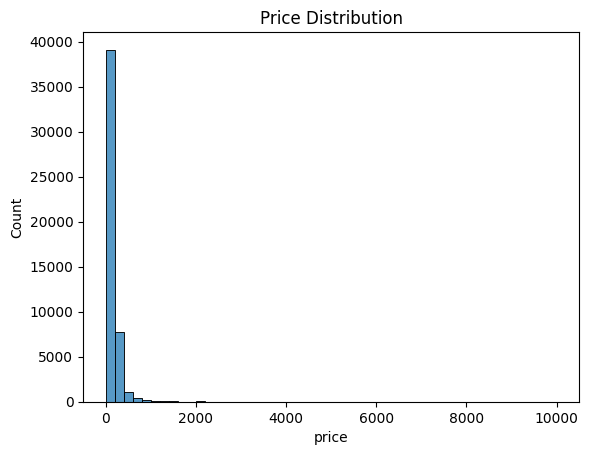

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the price distribution
sns.histplot(df_nyc["price"], bins=50)
plt.title("Price Distribution")
plt.show()

3. **Remove Outliers Using Z-score**

In [9]:
from scipy import stats

# Calculate the Z-scores of the 'price' column
df_nyc['z_score'] = stats.zscore(df_nyc['price'])

# Define the threshold (typically 3)
threshold = 3

# Filter the dataset by removing outliers (those with a Z-score above the threshold)
df_nyc_zscore_clean = df_nyc[abs(df_nyc['z_score']) < threshold]

# Print the number of rows before and after outlier removal
print(f"Rows before Z-score outlier removal: {df_nyc.shape[0]}")
print(f"Rows after Z-score outlier removal: {df_nyc_zscore_clean.shape[0]}")


Rows before Z-score outlier removal: 48895
Rows after Z-score outlier removal: 48507


4. **Remove Outliers Using Whiskers Approach**

In [10]:
# Calculate the Interquartile Range (IQR)
Q1 = df_nyc['price'].quantile(0.25)
Q3 = df_nyc['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the whiskers (1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset by removing outliers using the whiskers approach
df_nyc_whiskers_clean = df_nyc[(df_nyc['price'] >= lower_bound) & (df_nyc['price'] <= upper_bound)]

# Print the number of rows before and after outlier removal
print(f"Rows before Whiskers outlier removal: {df_nyc.shape[0]}")
print(f"Rows after Whiskers outlier removal: {df_nyc_whiskers_clean.shape[0]}")


Rows before Whiskers outlier removal: 48895
Rows after Whiskers outlier removal: 45923


5. **Visualizing the Price Distribution of Cleaned Datasets**

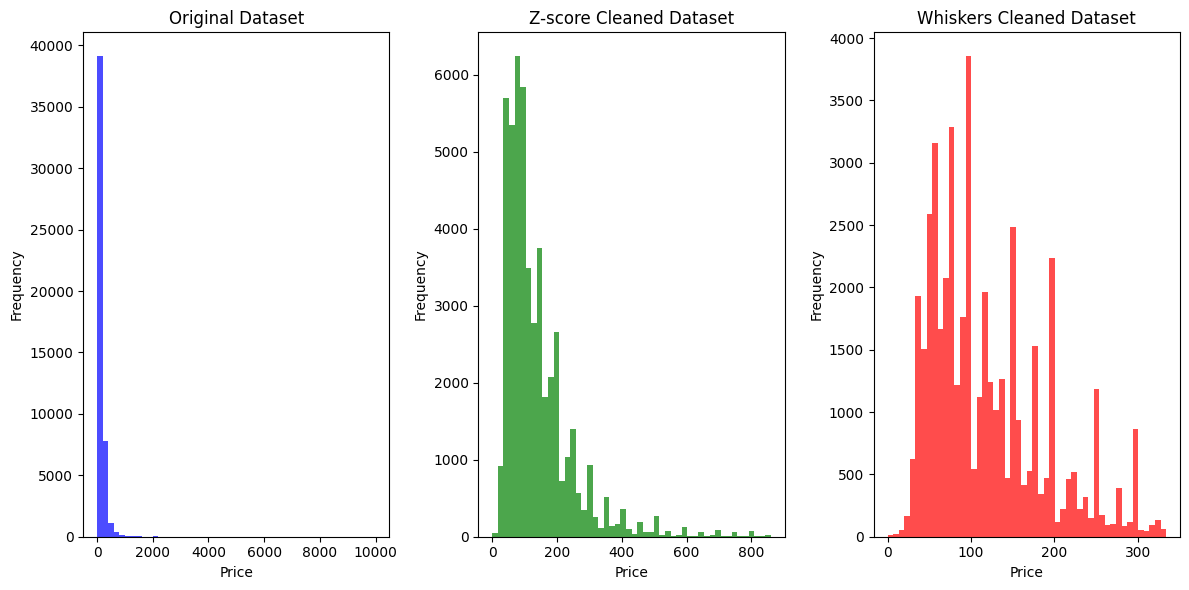

In [11]:
# Visualize the price distributions of the cleaned datasets using histograms
plt.figure(figsize=(12, 6))

# Histogram for original dataset
plt.subplot(1, 3, 1)
plt.hist(df_nyc['price'], bins=50, color='blue', alpha=0.7)
plt.title('Original Dataset')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for Z-score cleaned dataset
plt.subplot(1, 3, 2)
plt.hist(df_nyc_zscore_clean['price'], bins=50, color='green', alpha=0.7)
plt.title('Z-score Cleaned Dataset')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for whiskers cleaned dataset
plt.subplot(1, 3, 3)
plt.hist(df_nyc_whiskers_clean['price'], bins=50, color='red', alpha=0.7)
plt.title('Whiskers Cleaned Dataset')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


6. **Comparison of Outlier Removal Methods**

   **Number of Rows Removed**:
   - Z-score approach: Removed 388 rows (48895 - 48507).
   - Whiskers approach: Removed 2872 rows (48895 - 45923).

1. **Z-score Approach**:
    - This method calculates the Z-score for each data point and removes those with a Z-score above a certain threshold (in this case - 3).
    - It is more effective when the data is normally distributed.
    - It might be overly sensitive to outliers, potentially removing some legitimate data points that are simply on the tails of the distribution.
    - Similar shape to the original but narrower, with fewer outliers.

2. **Whiskers Approach (IQR Method)**:
    - This method calculates the Interquartile Range (IQR) and removes data points that lie outside the whiskers (1.5 * IQR).
    - It is more robust for non-normal distributions and handles skewed data better.
    - It generally removes more outliers compared to the Z-score approach, leading to a more concentrated distribution around the median price.
    - Even narrower, with a sharp cutoff around 300, indicating more aggressive outlier removal.

**Overall Comparison**:
    - Both methods effectively removed outliers, but the whiskers approach appears to be more effective in this particular case.
    - The choice between the two methods depends on the specific characteristics of the dataset and the desired level of outlier removal.
    - In case if we don't want to remove too many legitimate data points, the Z-score approach might be a more conservative option. However, in order to ensure a more outlier-free dataset, the whiskers approach is likely a better choice.

**Additional Considerations**:
    - It's always a good practice to explore the impact of outlier removal on other variables in the dataset to ensure that it doesn't introduce any unintended biases or distortions.